In [1]:
import os
import pandas as pd
import numpy as np
import itertools
from matplotlib import pyplot as plt
from datetime import datetime
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

%matplotlib inline

In [37]:
# stock return analysis

stock_price = pd.read_excel('./dataset/tickerdata.xlsx',sheet_name= 'Sheet1', engine='openpyxl', index_col=[0])

stock_tickers = stock_price.filter(regex='^(?!Unnamed)').columns
new_col       = np.repeat(stock_tickers,5)
stock_price.columns = new_col
close_price         = stock_price.loc[:,stock_price.iloc[0,]=='Close']
open_price          = stock_price.loc[:,stock_price.iloc[0,]=='Open']
volume             = stock_price.loc[:,stock_price.iloc[0,]=='Volume']

close_price        = close_price.reset_index()
close_price        = close_price .drop(index = [0,1])
#.columns[0] = ['DATE']
close_price  = close_price.set_index('index')

daily_return_close2close = close_price.diff(1)/close_price

daily_return_open2close = (close_price - open_price)/open_price

daily_return_open2close["sum_delta"] = (close_price - open_price).sum(axis=1)
daily_return_open2close["sum_opening"] = (open_price).sum(axis=1)

daily_return_open2close["sum_ratio"] = ((close_price - open_price)/open_price).sum(axis=1)

print(daily_return_open2close.head)


def get_cumulative_return_plot(df):
    plt.figure(figsize = (15,15))
    for ticker in df.columns:
        ((1+ df[ticker].fillna(0)).cumprod()-1).plot(label = ticker)
    plt.legend(loc = 'lower center',ncol=round(len(df.columns)/4))
    
    
def get_cumulative_return_tickers_plot(df,my_tickers):
    plt.figure(figsize = (15,15))
    for ticker in my_tickers:
        ((1+ df[ticker].fillna(0)).cumprod()-1).plot(label = ticker)
    plt.legend(loc = 'lower center',ncol=round(len(df.columns)/4))

#get_cumulative_return_plot(daily_return_close2close)
#get_cumulative_return_plot(daily_return_open2close)

#print(daily_return_open2close.head)

daily_trend = daily_return_open2close#._get_numeric_data()
#daily_trend[daily_trend < 0] = -1.0
#daily_trend[daily_trend > 0] = +1.0
#daily_trend[daily_trend == 0] = 0.0

daily_return_open2close= daily_return_open2close.fillna(0.0)
#daily_return_open2close.date

<bound method NDFrame.head of                            PLTR         RKT         ONE         AMC  \
2021-01-28 00:00:00  -0.0981285  -0.0730753  -0.0207792   -0.279633   
2021-01-29 00:00:00  -0.0390604   -0.120988  0.00537634  -0.0733753   
2021-02-01 00:00:00  -0.0387773 -0.00416081 -0.00269542   -0.217647   
2021-02-02 00:00:00  -0.0903225  -0.0407696  -0.0106101   -0.175105   
2021-02-03 00:00:00  -0.0194504  -0.0180556  -0.0134408   0.0135593   
...                         ...         ...         ...         ...   
2021-08-11 00:00:00  -0.0312093  0.00341888   0.0266586 -0.00094999   
2021-08-12 00:00:00   0.0179959 -0.00228446  -0.0800056   0.0698803   
2021-08-13 00:00:00 -0.00400002   0.0553425  -0.0356803    0.039441   
NaN                         NaN         NaN         NaN         NaN   
Date                        NaN         NaN         NaN         NaN   

                           REAL       SPCE          AMD          DD  \
2021-01-28 00:00:00   0.0755365 -0.0731025   -

In [43]:
def get_returns_plot(df, my_column_name):
    
    my_returns = []
    my_day_index = []

    port_value = 0 
    day_counter = 0
    
    for ind in daily_return_open2close.index:
        port_value+=daily_return_open2close[my_column_name][ind]
    
        my_returns.append(port_value)
        my_day_index.append(day_counter)
        day_counter+=1

    plt.plot(my_day_index, my_returns, label=my_column_name)
    return my_returns, my_day_index



starting with 2141.9917372770205
-1.5397029039698804
-1.0178790222428582
-0.3290043163714793
-1.1909113138711511
0.350961316300086
-0.6490785804605288
0.1577127712939438
-0.06719263149252015
0.23458227042719543
-0.04830031994465353
-0.5022530428088353
0.407457523232588
-0.5223152408481563
-0.5180352795447782
-0.5254159790534397
0.2584901637084699
-0.12910407028610618
0.26642343446053257
1.9443237242136118
-1.7364282642634516
-0.42147338635246967
0.462746540778569
-0.08106148867362843
-1.2100155201883322
-0.8265107689250102
-0.34318255723188157
-0.224240778811724
1.0499611001341738
-0.6418828466420369
0.41476295138310265
0.9047496777222286
-0.001454789318937057
-0.6621612315881401
0.868182257220197
-0.8508904404893521
0.2978378132473493
-0.3710119632195714
-0.9284957407240582
-1.5036293561527987
1.7504719040286805
-0.2556417511807829
-0.578388444295622
0.46061367399681247
0.5713282361443299
-0.4551498564963144
-0.18298184932777667
0.08889742965537079
-0.4835830054395495
0.20283843599660

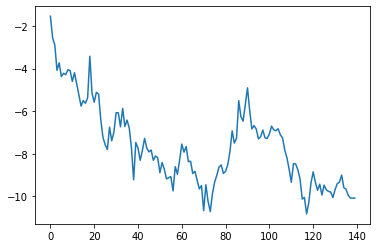

In [44]:
my_returns = []
my_day_index = []

beginning_port_value = daily_return_open2close["sum_opening"][0]
print("starting with {}".format(beginning_port_value))

port_value = 0 #beginning_port_value

day_counter = 0

for ind in daily_return_open2close.index:
    print(daily_return_open2close["sum_ratio"][ind])
    port_value+=daily_return_open2close["sum_ratio"][ind]
    
    #if port_value < 0:
    #    port_value = 0
    my_returns.append(port_value)
    my_day_index.append(day_counter)
    day_counter+=1

plt.plot(my_day_index, my_returns)

In [38]:
# check for the top 5 or bottom five
my_top_5 = ["PLTR","AAL","MVIS","GME","REAL"]
my_bot_5 = ["TSLA","TD","RKT","APP","BB"]


daily_return_open2close["top_five"] = daily_return_open2close[my_top_5].sum(axis=1)
daily_return_open2close["bot_five"] = daily_return_open2close[my_bot_5].sum(axis=1)

daily_return_open2close["test"] = daily_return_open2close.sum(axis=1)

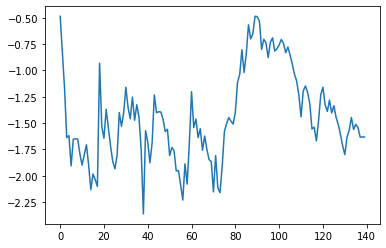

In [47]:
my_r_top, my_d_top = get_returns_plot(daily_return_open2close,"top_five")

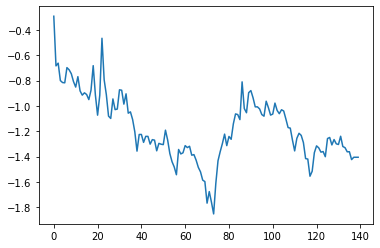

In [48]:
my_r_bot, my_d_bot = get_returns_plot(daily_return_open2close,"bot_five")

Text(0, 0.5, 'Day Return')

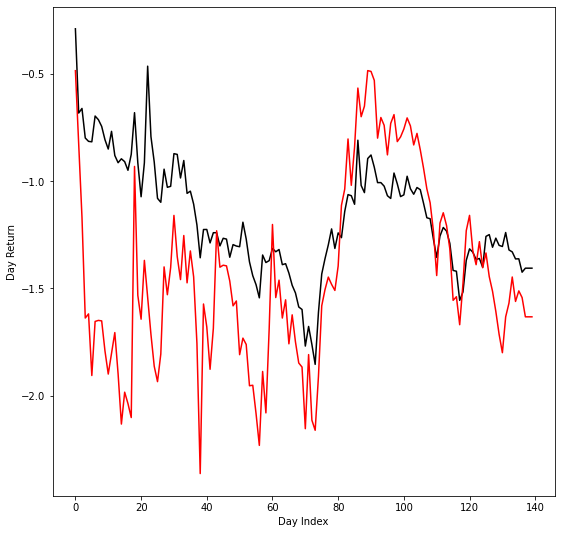

In [65]:
### overlay all: top. bot, and all
f, a = plt.subplots(figsize=(9,9))
a.plot(my_d_bot,my_r_bot,label="Bottom 5", c='k')
a.plot(my_d_top,my_r_top,label="Top 5", c='r')
#a.plot(my_day_index, my_returns,label="All",c='b')
a.set_xlabel("Day Index")
a.set_ylabel("Day Return")

In [151]:
import pandas as pd

def equity_model(stocks, sentiment_data, ticker_data):
    holding_dict = dict()
    equity_dict = dict()
    weight_dict = dict.fromkeys(stocks,0)
    for i, day in sentiment_data.iterrows():
        if int(day['Day']) in ticker_data.Day.values:
            print('Day', day['Day'])
            
            equity = 0
            for stock in stocks.keys():
                #weight_dict[stock] = 0
                if day[stock] > 0:
                    # buy stock
                    stocks[stock] += day[stock]
                    if stock in weight_dict: 
                        weight_dict[stock]+=1
                    else:
                        weight_dict[stock]=1
                elif day[stock] < 0:
                    # sell stock
                    if stocks[stock] > day[stock]:
                        stocks[stock] -= day[stock]
                        if stock in weight_dict: 
                            weight_dict[stock]-=1
                        else:
                            weight_dict[stock]=0
                    else:
                        stocks[stock] = 0
                        #weight_dict[stock] nothing
                        #weight_dict[stock]=0
                sent_factor = 1 #ticker_data.loc[ticker_data['Day']==int(day['Day']),stock].values[0]
                
                #print(weight_dict)
                
                tmp_weight = {key : abs(val) for key, val in weight_dict.items()}
                tot_shares = sum(tmp_weight.values())
                if tot_shares == 0:
                    tot_shares+=1
                weight_factor = {k: abs(v)/abs(tot_shares) for k, v in  weight_dict.items()}
                
                equity += stocks[stock] * (weight_factor[stock]) #ticker_data.loc[ticker_data['Day']==int(day['Day']),stock].values[0]
                # else hold
                # else hold
                equity_dict[int(day['Day'])] = equity
                holding_dict[int(day['Day'])] = pd.DataFrame(stocks, index = [int(day['Day'])])
           
            #print(equity, stocks)
    #print(equity) 
    return equity_dict, holding_dict



stocks = { 'PLTR':0,'RKT':0,'ONE':0,'AMC':0,'REAL':0,'SPCE':0,'AMD':0,'DD':0,'GME':0,'TSLA':0,'CRSR':0,'RH':0,'BB':0,'CLOV':0,
    'NOK':0,'AM':0,'WISH':0,'UWMC':0,'BY':0,'MVIS':0,'NIO':0,'APP':0,'SNDL':0,'AAL':0,'TD':0 }

my_top5 = {"AAL":0, "MVIS":0 ,"GME":0 ,"REAL":0 }
my_bot5 = {"TSLA":0,"TD":0 ,"RKT":0,"APP":0,"BB":0}



sentiment_data =  pd.read_csv('dataset/sentiment_ticker_by_day_sum.csv').set_index('Day').shift(1)
sentiment_data['Day'] = sentiment_data.index
ticker_data = pd.read_excel('dataset/tickerdata_day_open.xlsx', sheet_name= 'Sheet1', engine='openpyxl')#, index_col=[0])

#sell_at_end_model(my_top5, sentiment_data, ticker_data)
#sentiment_data =  pd.read_csv('dataset/sentiment_ticker_by_day.csv')
#sell_at_end_model(my_top5, sentiment_data, ticker_data)


#print(sentiment_data.head)
eq_dict, hld_dict = equity_model(my_top5, sentiment_data, ticker_data)

Day 44224.0
Day 44225.0
Day 44228.0
Day 44229.0
Day 44230.0
Day 44231.0
Day 44232.0
Day 44235.0
Day 44236.0
Day 44237.0
Day 44238.0
Day 44239.0
Day 44243.0
Day 44244.0
Day 44245.0
Day 44246.0
Day 44249.0
Day 44250.0
Day 44251.0
Day 44252.0
Day 44253.0
Day 44256.0
Day 44257.0
Day 44258.0
Day 44259.0
Day 44260.0
Day 44263.0
Day 44264.0
Day 44265.0
Day 44266.0
Day 44267.0
Day 44270.0
Day 44271.0
Day 44272.0
Day 44273.0
Day 44274.0
Day 44277.0
Day 44278.0
Day 44279.0
Day 44280.0
Day 44281.0
Day 44284.0
Day 44285.0
Day 44286.0
Day 44287.0
Day 44291.0
Day 44292.0
Day 44293.0
Day 44294.0
Day 44295.0
Day 44298.0
Day 44299.0
Day 44300.0
Day 44301.0
Day 44302.0
Day 44305.0
Day 44306.0
Day 44307.0
Day 44308.0
Day 44309.0
Day 44312.0
Day 44313.0
Day 44314.0
Day 44315.0
Day 44316.0
Day 44321.0
Day 44322.0
Day 44323.0
Day 44326.0
Day 44327.0
Day 44328.0
Day 44329.0
Day 44330.0
Day 44333.0
Day 44334.0
Day 44335.0
Day 44336.0
Day 44337.0
Day 44340.0
Day 44341.0
Day 44342.0
Day 44343.0
Day 44344.0
Day 

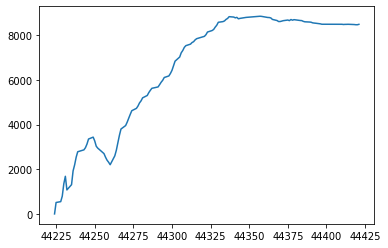

In [152]:
plt.plot(list(eq_dict.keys()), list(eq_dict.values()))